In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
# from scipy.interpolate import interp1d


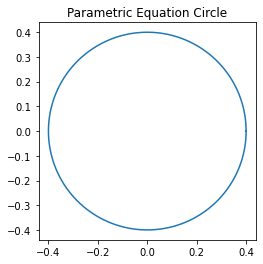

In [2]:
figure, axes = plt.subplots( 1 )
radius = 0.4
theta = np.linspace( 0 , 2 * np.pi , 150 )

a = radius * np.cos( theta )
b = radius * np.sin( theta )
axes.plot( a, b )
axes.set_aspect( 1 )
 
plt.title( 'Parametric Equation Circle' )
plt.show()

In [3]:
def ablation_shape(radius, start=0, end=2*np.pi):
    theta = np.linspace( start , end , 150 )

    a = radius * np.cos( theta )
    b = radius * np.sin( theta )

    return a, b

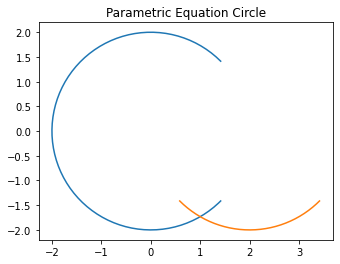

In [4]:
figure, axes = plt.subplots( 1 )

a, b = ablation_shape(radius = 2, start = 0.25*np.pi, end = 1.75*np.pi)
axes.plot(a, b)

a, b = ablation_shape(radius = 2, start = 1.25*np.pi, end = 1.75*np.pi)
a += 2
axes.plot(a, b)

axes.set_aspect( 1 )
 
plt.title( 'Parametric Equation Circle' )
plt.show()

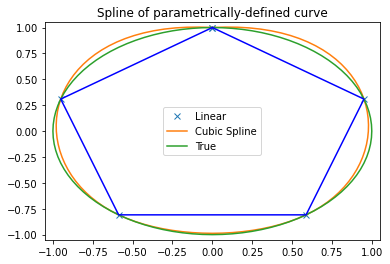

In [5]:
t = np.arange(0, 1.1, .2)
x = np.sin(2*np.pi*t)
y = np.cos(2*np.pi*t)
tck, u = interpolate.splprep([x, y], s=0)
unew = np.arange(0, 1.01, 0.01)
out = interpolate.splev(unew, tck)
plt.figure()
plt.plot(x, y, 'x', out[0], out[1], np.sin(2*np.pi*unew), np.cos(2*np.pi*unew), x, y, 'b')
plt.legend(['Linear', 'Cubic Spline', 'True'])
plt.axis([-1.05, 1.05, -1.05, 1.05])
plt.title('Spline of parametrically-defined curve')
plt.show()

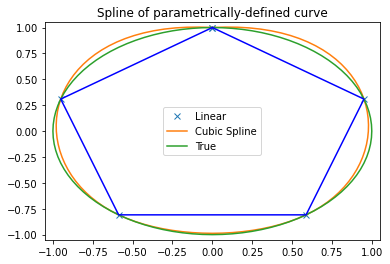

In [6]:
t = np.arange(0, 1.1, .2)
x = np.sin(2*np.pi*t)
y = np.cos(2*np.pi*t)
tck, u = interpolate.splprep([x, y], s=0)
unew = np.arange(0, 1.01, 0.01)
out = interpolate.splev(unew, tck)
plt.figure()
plt.plot(x, y, 'x', out[0], out[1], np.sin(2*np.pi*unew), np.cos(2*np.pi*unew), x, y, 'b')
plt.legend(['Linear', 'Cubic Spline', 'True'])
plt.axis([-1.05, 1.05, -1.05, 1.05])
plt.title('Spline of parametrically-defined curve')
plt.show()

In [7]:

def get_normals(xo, yo, length=.2):
    xn = []
    yn = []
    for idx in range(len(xo)-1):
        x0, y0, xa, ya = xo[idx], yo[idx], xo[idx+1], yo[idx+1]
        dx, dy = xa-x0, ya-y0
        norm = math.hypot(dx, dy) * 1/length
        dx /= norm
        dy /= norm
        
#         plt.plot((x0, x0-dy), (y0, y0+dx))    # plot the normals
#         plt.scatter(x0-dy, y0+dx)
        xn.append(x0-dy)
        yn.append(y0+dx)
    return xn, yn

(7,) (7,)
16 16


(-2.1999988376022936,
 2.1999982505984828,
 -0.9094333477221416,
 0.9093582525923227)

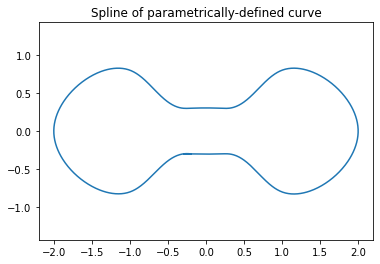

In [8]:
import math
x = np.array([-0.2, -0.3, -1, -2, -1,  -0.3, -0.2])
y = np.array([-0.3, -0.3, -0.8,  0,         0.8,  0.3, 0.3])
print(x.shape, np.flip(x*-1).shape)

x = np.concatenate((x, np.flip(x*-1)))
y = np.concatenate((y, y*-1))
x = np.concatenate((x, np.asarray([-0.2, -0.3])))
y = np.concatenate((y, np.asarray([-0.3, -0.3])))

print(len(x), len(y))

tck, u = interpolate.splprep([x, y], s=0)
unew = np.arange(0, 1.0, 0.001)
out = interpolate.splev(unew, tck)
xo = out[0]#[0:-15]
yo = out[1]#[0:-15]
plt.figure()
plt.plot(xo, yo, label = 'Spline')

# plt.scatter(x, y, )
plt.title('Spline of parametrically-defined curve')

    
xn, yn, = get_normals(xo, yo)
# plt.plot(xn, yn);
# get_normals()
plt.axis('equal')

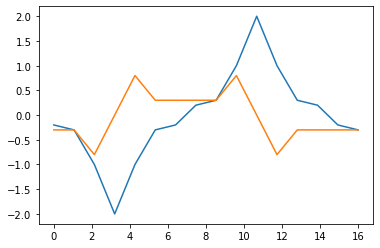

In [9]:
t = np.linspace(0, len(x), len(x))
plt.plot(t, x)
plt.plot(t, y)

[[ 0]
 [ 7]
 [22]
 [29]]
(30,) (30,)
(4, 1) (4, 1)


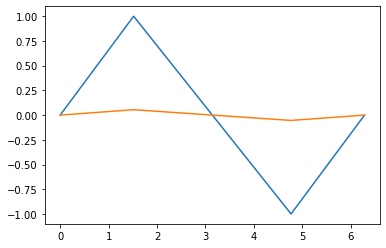

In [10]:
t = np.linspace(0, 2*np.pi, 30)
t2 = np.linspace(0, 0.5*np.pi, 30)
x = np.sin(t)
y = (np.cos(t) * np.sin(t)) 
idx = np.argwhere(np.abs(y) < 0.1)
print(idx)
print(x.shape, y.shape)
x = x[~idx]
y = y[~idx]
t = t[~idx]
print(x.shape, y.shape)

plt.plot(t, x)
plt.plot(t, y)

In [11]:
tck, u = interpolate.splprep([x, y], s=0)
unew = np.arange(0, 1.01, 0.01)
out = interpolate.splev(unew, tck)
plt.figure()
plt.plot(out[0], out[1], label = 'Spline')
plt.scatter(x, y, )
# plt.legend([' Spline', 'True'])
# plt.axis([-1.05, 1.05, -1.05, 1.05])
plt.title('Spline of parametrically-defined curve')
plt.show()

ValueError: too many values to unpack (expected 2)

In [12]:
import math

# x = np.array([1.25, 0.5,    0, -0.5, -1, -0.5,    0, 0.5, 1.25])
# y = np.array([0,   -1,  -0.6,   -1,  0,     1, 0.6,   1, 0])
# x = np.array([0, -0.05, -0.1, -0.75, -1.25, -2.5, -1.25, -0.75,  -0.1, -0.05,  0])
# y = np.array([-0.3, -0.3, -0.3,  -0.8,    -0.8,    0,     0.8,     0.8,   0.3,   0.3, 0.3])
x = np.array([-0.2, -0.3, -1, -2, -1,  -0.3, -0.2])
y = np.array([-0.3, -0.3, -0.8,  0,         0.8,  0.3, 0.3])

x = np.concatenate((x, np.flip(x*-1)))
y = np.concatenate((y, y*-1))
x = np.concatenate((x, np.asarray([-0.2, -0.3])))
y = np.concatenate((y, np.asarray([-0.3, -0.3])))

def __interpolate(x, y):
    tck, u = interpolate.splprep([x, y], s=0)
    unew = np.arange(0, 1.0, 0.001)
    out = interpolate.splev(unew, tck)
    xo = out[0]
    yo = out[1]
    return xo, yo

# plt.plot(xo, yo, color = 'green')
# plt.plot(-xo, yo, color = 'green')

# plt.scatter(x, y)


def get_normals(xo, yo, length=.2):
    xn = []
    yn = []
    for idx in range(len(xo)-1):
        x0, y0, xa, ya = xo[idx], yo[idx], xo[idx+1], yo[idx+1]
        dx, dy = xa-x0, ya-y0
        norm = math.hypot(dx, dy) * 1/length
        dx /= norm
        dy /= norm
        
        xn.append(x0-dy)
        yn.append(y0+dx)
    return xn, yn

x_tumor, y_tumor = __interpolate(x, y)
x_margin, y_margin, = get_normals(x_tumor, y_tumor, length=0.3)
x_margin = np.asarray(x_margin)
y_margin = np.asarray(y_margin)
# y_tumor = np.concatenate((y_tumor, y_tumor))
# x_tumor = np.concatenate((x_tumor, -x_tumor))
# y_margin = np.concatenate((y_margin, y_margin))
# x_margin = np.concatenate((x_margin, -x_margin))

In [13]:
x = np.array([0, -0.05, -0.1, -0.8, -2, -2.5, -2, -0.8,  -0.1, -0.05,  0])
y = np.array([0,     0,    0,    1,  1,    0,  1,    1,     0,     0,  0])

x_power, y_power = __interpolate(x, y)
y_power = np.concatenate((y_power, y_power))
x_power = np.concatenate((x_power, -x_power))

(1998,) (999,)
[0 0]  is in polygon:  False
(120, 120) (1, 120) (120, 1) (120,) (120,)


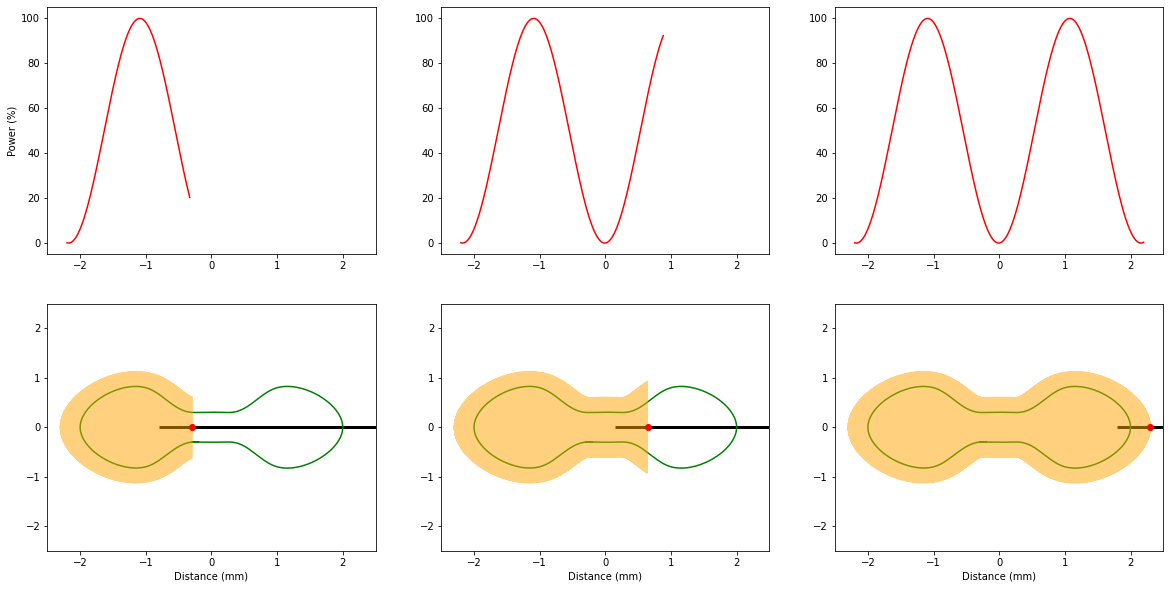

In [38]:




# x_idx = np.argsort(x_power)
# y_power = y_power[x_idx]
# x_power = x_power[x_idx]
power_offset = 1.5
# x_power = np.linspace(-1/2*np.pi, (1+1/2)*np.pi, len(x_margin))-power_offset
x_power = np.linspace(-2.2, 2.2, len(x_margin))
y_power = (np.sin((x_power-2.7)*2.9) + 1) * 50

x_idx = np.argsort(x_margin)
y_margin = y_margin[x_idx]
x_margin = x_margin[x_idx]


fig = plt.figure(figsize=(20, 10))
plt.subplot(2, 3, 1)
range_ = list(range(425))
plt.plot(x_power[range_], y_power[range_], color='red');
plt.xlim(-2.5, 2.5)
plt.ylabel("Power (%)")
# plt.ylim(-2.5, 2.5)

plt.subplot(2, 3, 2)
range_ = list(range(700))
plt.plot(x_power[range_], y_power[range_], color='red');
plt.xlim(-2.5, 2.5)
# plt.ylabel("Power (%)")


# plt.ylim(-2.5, 2.5)

plt.subplot(2, 3, 3)
plt.plot(x_power, y_power, color='red');
plt.xlim(-2.5, 2.5)
# plt.ylabel("Power (%)")

# plt.ylim(-2.5, 2.5)

plt.subplot(2, 3, 4)
range_ = list(range(400))
plt.plot(x_tumor, y_tumor, color='green')
# plt.plot(-x_tumor, y_tumor, color='green')
plt.plot(x_margin[range_], y_margin[range_], color='orange', alpha=0.5);
plt.hlines(xmin=-0.8, xmax=2.5, y=0, linewidth=3);
plt.plot(-0.3, 0, 'ro');
plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)
plt.xlabel("Distance (mm)")
# plt.axis('equal')

plt.subplot(2, 3, 5)
# x_idx = np.argsort(-x_margin)
# y_margin_r = y_margin[x_idx]
# x_margin_r = x_margin[x_idx]
range_ = list(range(700))
plt.plot(x_tumor, y_tumor, color='green')
# plt.plot(-x_tumor, y_tumor, color='green')
plt.plot(x_margin[range_], y_margin[range_], color='orange', alpha=0.5);
plt.hlines(xmin=0.15, xmax=2.5, y=0, linewidth=3);
plt.plot(0.65, 0, 'ro');
# plt.plot(-x_margin_r[range_], y_margin_r[range_], color='orange', alpha=0.5);
plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)
plt.xlabel("Distance (mm)")


plt.subplot(2, 3, 6)
range_= list(range(990))
# x_idx = np.argsort(x_margin)
# y_margin_r = y_margin[x_idx]
# x_margin = x_margin[x_idx]
plt.plot(x_tumor, y_tumor, color='green')
# plt.plot(-x_tumor, y_tumor, color='green')
plt.plot(x_margin[range_], y_margin[range_], color='orange', alpha=0.5);
plt.hlines(xmin=1.8, xmax=2.5, y=0, linewidth=3);
plt.plot(2.3, 0, 'ro');
plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)
plt.xlabel("Distance (mm)")

# fig.text(0.5, 0, 'Distance', ha='center')
# fig.text(0.04, 0.5, 'common Y', va='center', rotation='vertical')
# plt.plot(-x_margin, y_margin, color='orange', alpha=0.5);
x, y, z = get_inside(x_margin, y_margin)
# z_dist = ndimage.distance_transform_edt(~z, sampling=(0.5, 0.5))
# plt.contour(x, y, z_dist, linestyles='dashed', cmap  ='jet')
# plt.xlim(-3, 3)
# plt.ylim(-1, 1)

Text(0.5, 0, 'Distance (mm)')

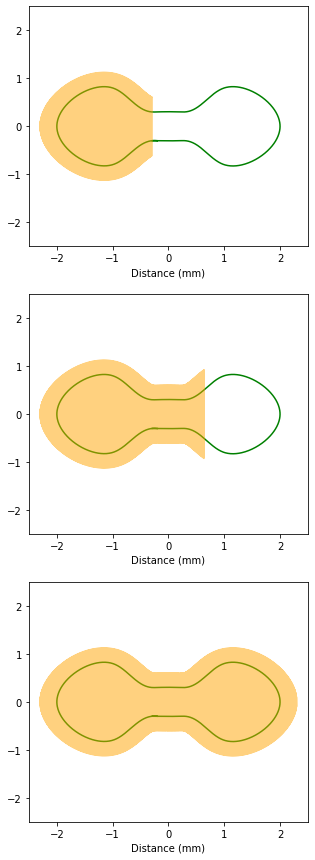

In [15]:
fig = plt.figure(figsize=(5, 15))

plt.subplot(3, 1, 1)
range_ = list(range(400))
plt.plot(x_tumor, y_tumor, color='green')
# plt.plot(-x_tumor, y_tumor, color='green')
plt.plot(x_margin[range_], y_margin[range_], color='orange', alpha=0.5);
plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)
plt.xlabel("Distance (mm)")
# plt.axis('equal')

plt.subplot(3, 1, 2)
# x_idx = np.argsort(-x_margin)
# y_margin_r = y_margin[x_idx]
# x_margin_r = x_margin[x_idx]
range_ = list(range(700))
plt.plot(x_tumor, y_tumor, color='green')
# plt.plot(-x_tumor, y_tumor, color='green')
plt.plot(x_margin[range_], y_margin[range_], color='orange', alpha=0.5);
# plt.plot(-x_margin_r[range_], y_margin_r[range_], color='orange', alpha=0.5);
plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)
plt.xlabel("Distance (mm)")


plt.subplot(3, 1, 3)
range_= list(range(990))
# x_idx = np.argsort(x_margin)
# y_margin_r = y_margin[x_idx]
# x_margin = x_margin[x_idx]
plt.plot(x_tumor, y_tumor, color='green')
# plt.plot(-x_tumor, y_tumor, color='green')
plt.plot(x_margin[range_], y_margin[range_], color='orange', alpha=0.5);
plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)
plt.xlabel("Distance (mm)")

In [16]:
2.7/np.pi

0.8594366926962349

In [17]:
import matplotlib.path as mplPath
def get_inside(x_tumor, y_tumor):
    x_tumor_stack = np.concatenate((x_tumor, -x_tumor))
    y_tumor_stack = np.concatenate((y_tumor, y_tumor))
    print(x_tumor_stack.shape, x_tumor.shape)
    poly_path = mplPath.Path(np.vstack((x_tumor_stack, y_tumor_stack)).T)
    point = np.asarray([0, 0])
    print(point, " is in polygon: ", poly_path.contains_point(point))
    x = np.arange(-3, 3, 0.05)
    y = np.arange(-3, 3, 0.05)
    xx, yy = np.meshgrid(x, y, sparse=True)
    z = np.zeros((xx.shape[1], yy.shape[0]))
    print(z.shape, xx.shape, yy.shape, x.shape, y.shape)
    for i in range(xx.shape[1]):
        for j in range(yy.shape[0]):
            z[i, j] = poly_path.contains_point((xx[0,j], yy[i,0]))
    z = ndimage.binary_dilation(z, structure=np.ones((3, 3)))
    z = z.astype(np.bool_)
    return x, y, z

x, y, z = get_inside(x_tumor, y_tumor)
# h = plt.contourf(x, y, z)
# plt.axis('scaled')
# # plt.ylim(-1, 1)
# plt.show()

(2000,) (1000,)
[0 0]  is in polygon:  False
(120, 120) (1, 120) (120, 1) (120,) (120,)


NameError: name 'ndimage' is not defined

In [18]:
from scipy import ndimage
z_dist = ndimage.distance_transform_edt(z, sampling=(0.5, 0.5))
plt.contour(x, y, z_dist, linestyles='dashed', cmap  ='jet')
plt.axis('scaled')
plt.show()

NameError: name 'z' is not defined

In [19]:
plt.hist(z_dist)

NameError: name 'z_dist' is not defined

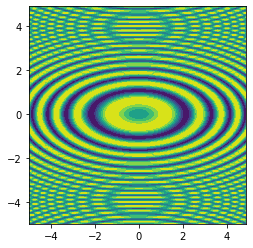

In [20]:
x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)
xx, yy = np.meshgrid(x, y, sparse=True)
z = np.sin(xx**2 + (4*yy**2)) 
h = plt.contourf(x, y, z)
plt.axis('scaled')
plt.show()

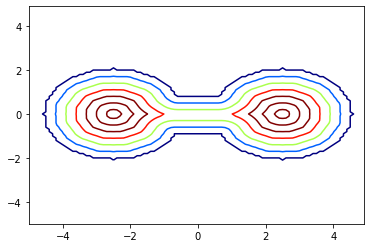

In [21]:
x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)
xx, yy = np.meshgrid(x, y, sparse=True)
# z = np.sin(xx**1 + (yy**2)) 
z = np.zeros((xx.shape[1], yy.shape[0])).astype(np.bool_)
# circle = (xx - 100) ** 2 + (yy - 100) ** 2
# z = z & (circle>600)
z[50, 25] = 1
z[50, 75] = 1
z_dist = ndimage.distance_transform_edt(~z, sampling=(0.1, 0.1)) 
z = z_dist > 2
z[42:58, 40:60] = 0
z_dist = ndimage.distance_transform_edt(~z, sampling=(0.1, 0.1)) 
# z = z_dist > 0.5
# z_dist = ndimage.distance_transform_edt(~z, sampling=(0.1, 0.1)) 
plt.contour(x, y, z_dist, linestyles='solid', cmap  ='jet', vmin=0.1, vmax=1)

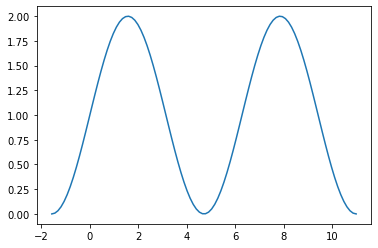

In [22]:
x = np.linspace(-1/2*np.pi, (3+1/2)*np.pi, 100)
y = np.sin(x) + 1

plt.plot(x, y)